In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
from demoparser.demofile import DemoFile
from matplotlib.patches import ConnectionPatch
import inspect

In [271]:
result = []

## Round start

In [3]:
def r_start(event, msg):
    for idx, key in enumerate(event['event'].keys):
        if key.name == 'objective':
            objective = msg.keys[idx].val_string
     
    result.append([objective])

## Player death

In [4]:
all_attackers_positions = []
all_victims_positions = []

def death(event, msg):
    for idx, key in enumerate(event['event'].keys):
        if key.name == 'attacker':
            user_id = msg.keys[idx].val_short
            attacker = d.entities.get_by_user_id(user_id)
        elif key.name == 'userid':
            user_id = msg.keys[idx].val_short
            victim = d.entities.get_by_user_id(user_id)
        elif key.name == 'weapon':
            weapon = msg.keys[idx].val_string
        elif key.name == 'headshot':
            headshot = msg.keys[idx].val_bool 
        
    if attacker and victim:
        result.append([attacker.position, victim.position])
#         print("\n --- Player Death at tick {}---".format(d.current_tick))
#         print("{} killed by {} with {}. Headshot? {}.\n"
#               "Attacker: health = {} position = {}\n"
#               "Victim: position = {}".format(
#                   victim.name,
#                   attacker.name,
#                   weapon,
#                   'Yes' if headshot else 'No',
#                   attacker.health,
#                   attacker.position,
#                   victim.position))
       
        all_attackers_positions.append(attacker.position)
        all_victims_positions.append(victim.position)

if __name__ == "__main__":
    data = open('./data/ECSSeason2Finals-astralis-vs-faze-dust2.dem', 'rb').read()
#     d = DemoFile(data)
#     d.add_callback('player_death', death)
#     d.parse()

# Round end

## First way

In [5]:
# def get_field(key_name, key, idx, msg):
#     if key.name == key_name:
#         print(dir(msg.keys[idx]))
#         return msg.keys[idx]

In [6]:
# def r_end(event, msg):
#     for idx, key in enumerate(event['event'].keys):
#         get_field('winner', key, idx, msg)

#     winner = get_field('winner')
            
#     print(winner)
#     print(reason)
#     print(legacy)
#     print(message)
#     print(player_count)
#     print("-------------------------")

## Second way

In [7]:
# def r_end(event, msg):
#     for idx, key in enumerate(event['event'].keys):
#         def get_field(key_name):
#             if key.name == key_name:
#                print(dir(msg.keys[idx]))
#                return msg.keys[idx]

#     winner = get_field('winner')
            
#     print(winner)
#     print(reason)
#     print(legacy)
#     print(message)
#     print(player_count)
#     print("-------------------------")

## Third way (the worst)

In [5]:
def r_end(event, msg):
    for idx, key in enumerate(event['event'].keys):
        if key.name == 'winner':
            winner = msg.keys[idx].val_byte
        elif key.name == 'reason':
            reason = msg.keys[idx].val_byte
        elif key.name == 'legacy':
            legacy = msg.keys[idx].val_byte
        elif key.name == 'message':
            message = msg.keys[idx].val_string
        elif key.name == 'player_count':
            player_count = msg.keys[idx].val_short
     
    result.append([message])
    
#     print("winner team id: ", winner)
#     print("reason of winning: ", reason)
#     print("legacy: ", legacy)
#     print("end round msg: ", message)
#     print("player count at the end of the round: ", player_count)
#     print("------------------------------------------------------")

In [6]:
def m_start(event, msg):
    result.append("Match start")

In [272]:
d = DemoFile(data)
d.add_callback('round_announce_match_start', m_start)
d.add_callback('round_start', r_start)
d.add_callback('player_death', death)
d.add_callback('round_end', r_end)
d.parse()

In [273]:
def remove_warmup(lst):
    match_start_idx = len(lst) - 1 - lst[::-1].index("Match start")
    new_res = lst[match_start_idx:]
    return new_res                

In [369]:
new_result = remove_warmup(result)

In [370]:
round_end_msgs = [['#SFUI_Notice_Bomb_Defused'], ['#SFUI_Notice_CTs_Win'], ['#SFUI_Notice_Target_Saved'], ['#SFUI_Notice_Terrorists_Win'], ['#SFUI_Notice_Target_Bombed']]

In [371]:
def define_round_num(lst):
    counter = 1
    for i in range(len(lst)):
        if lst[i] in round_end_msgs:
            lst[i] = [{"Round msg": lst[i][0], "round num": counter}]
            counter += 1
    return lst

In [372]:
res_with_round_num = define_round_num(new_result)

In [373]:
xd = res_with_round_num.copy()

In [374]:
def remove_trash(lst):
    for el in lst:
        if el == "Match start" or el == ['BOMB TARGET']:
            lst.pop(lst.index(el))
    return lst

In [375]:
res_no_trash = remove_trash(xd)

In [377]:
def add_kills_to_list(lst):
    res_lst = []
    
    for i in range(len(lst)):
        for key in lst[i][0]:
            if key == 'Round msg':
                res_lst.append(lst[i])
                
    
    return res_lst  

In [378]:
list_of_rounds = add_kills_to_list(res_no_trash)

In [380]:
def fucntion_xd(lst, lst2):
    xd = []
    for j in range(len(lst2)):
        print(lst2[j])
        for i in range(len(lst)):
            if lst2[j] == lst[i]:
                xd.append(lst2[:lst2.index(lst2[j])])
        #if lst[i] == lst2[j]:
    return xd

In [381]:
fucntion_xd(list_of_rounds, res_no_trash)

[{'x': 1237.5301513671875, 'y': 2463.96875, 'z': 96.03125}, {'x': 1307.9124755859375, 'y': 1301.5885009765625, 'z': 1.9669647216796875}]
[{'x': 1321.4007568359375, 'y': 2595.9150390625, 'z': 87.40704345703125}, {'x': 986.7798461914062, 'y': 2518.5908203125, 'z': 96.03125}]
[{'x': 216.70965576171875, 'y': 1423.8365478515625, 'z': 0.03125}, {'x': 483.409423828125, 'y': 1933.0474853515625, 'z': 105.37750244140625}]
[{'x': 1235.6405029296875, 'y': 2147.337890625, 'z': 3.0740275382995605}, {'x': 1399.0667724609375, 'y': 1840.578857421875, 'z': 4.92442512512207}]
[{'x': 1060.704345703125, 'y': 2032.007080078125, 'z': 13.075408935546875}, {'x': 932.1242065429688, 'y': 2496.3447265625, 'z': 96.03125}]
[{'x': 1544.0172119140625, 'y': 2268.470703125, 'z': 18.719839096069336}, {'x': 1131.113037109375, 'y': 2934.364501953125, 'z': 131.73223876953125}]
[{'x': 1404.63818359375, 'y': 2503.379150390625, 'z': 60.18585968017578}, {'x': 349.13543701171875, 'y': 2095.122314453125, 'z': 96.03125}]
[{'Round

[[[{'x': 1237.5301513671875, 'y': 2463.96875, 'z': 96.03125},
   {'x': 1307.9124755859375,
    'y': 1301.5885009765625,
    'z': 1.9669647216796875}],
  [{'x': 1321.4007568359375, 'y': 2595.9150390625, 'z': 87.40704345703125},
   {'x': 986.7798461914062, 'y': 2518.5908203125, 'z': 96.03125}],
  [{'x': 216.70965576171875, 'y': 1423.8365478515625, 'z': 0.03125},
   {'x': 483.409423828125, 'y': 1933.0474853515625, 'z': 105.37750244140625}],
  [{'x': 1235.6405029296875, 'y': 2147.337890625, 'z': 3.0740275382995605},
   {'x': 1399.0667724609375, 'y': 1840.578857421875, 'z': 4.92442512512207}],
  [{'x': 1060.704345703125, 'y': 2032.007080078125, 'z': 13.075408935546875},
   {'x': 932.1242065429688, 'y': 2496.3447265625, 'z': 96.03125}],
  [{'x': 1544.0172119140625, 'y': 2268.470703125, 'z': 18.719839096069336},
   {'x': 1131.113037109375, 'y': 2934.364501953125, 'z': 131.73223876953125}],
  [{'x': 1404.63818359375, 'y': 2503.379150390625, 'z': 60.18585968017578},
   {'x': 349.13543701171875,

In [ ]:
df = pd.DataFrame(all_attackers_positions)
df2 = pd.DataFrame(all_victims_positions)

In [12]:
df.columns = ['att_x', 'att_y', 'att_z']
df2.columns = ['vic_x', 'vic_y', 'vic_z']

In [13]:
df = df.drop('att_z', axis = 'columns')
df2 = df2.drop('vic_z', axis = 'columns')

In [14]:
res_df = pd.concat([df, df2], axis = 1)

In [15]:
# points for old dust 2: StartX = -2486; StartY = -1150; EndX = 2127; EndY = 3455; ResX = 1024; ResY = 1024;

def pointx_to_resolutionx(xinput, startX = -2486, endX = 2127, resX = 1024):
    sizeX = endX - startX
    if startX < 0:
        xinput += startX * (-1.0)
    else:
        xinput += startX
    xoutput = float((xinput / abs(sizeX)) * resX);
    return xoutput

def pointy_to_resolutiony(yinput, startY = -1150, endY = 3455, resY = 1024):
    sizeY = endY - startY
    if startY < 0:
        yinput += startY * (-1.0)
    else:
        yinput += startY
    youtput = float((yinput / abs(sizeY)) * resY);
    return resY - youtput - 10

# Convert the data to radar positions

res_df['att_map_x'] = res_df['att_x'].apply(pointx_to_resolutionx)
res_df['att_map_y'] = res_df['att_y'].apply(pointy_to_resolutiony)
res_df['vic_map_x'] = res_df['vic_x'].apply(pointx_to_resolutionx)
res_df['vic_map_y'] = res_df['vic_y'].apply(pointy_to_resolutiony)

In [16]:
im = plt.imread('./maps/de_dust2.png')

In [17]:
# fig, ax = plt.subplots(figsize = (6,6))

# ax.scatter(res_df.att_map_x, res_df.att_map_y, alpha = 0.3, c = 'b')
# ax.scatter(res_df.vic_map_x, res_df.vic_map_y, alpha = 0.3, c = 'r')

# ax.imshow(im)

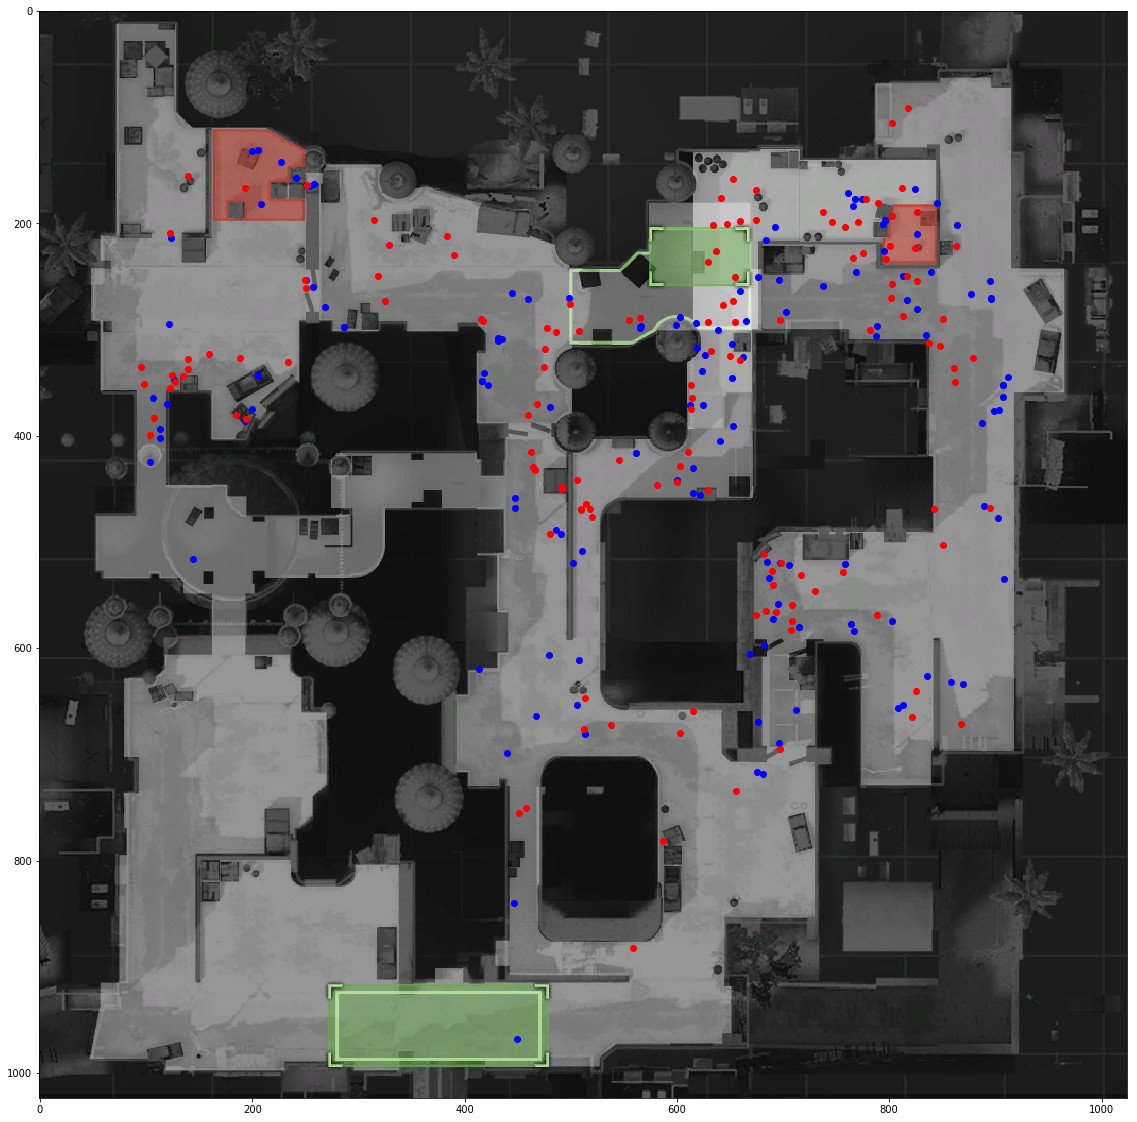

In [17]:
fig, ax = plt.subplots(figsize = (20, 20))

ax.scatter(res_df.att_map_x, res_df.att_map_y, alpha = 1, c = 'b')
ax.scatter(res_df.vic_map_x, res_df.vic_map_y, alpha = 1, c = 'r')

ax.imshow(im)
plt.savefig('dust2_astralis_vs_faze_no_lines.jpg')

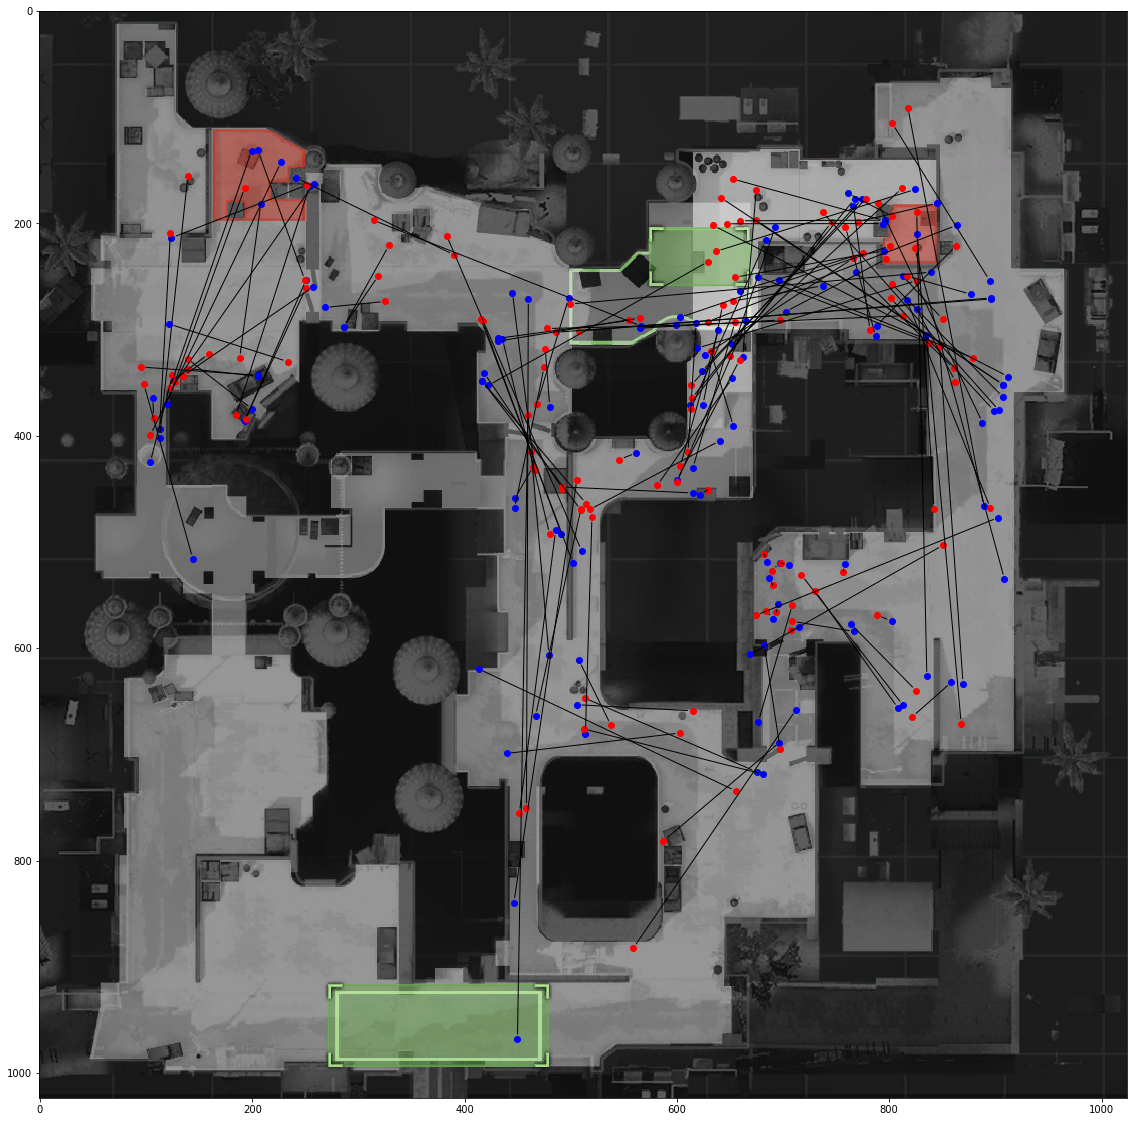

In [18]:
fig, ax = plt.subplots(figsize = (20, 20))

ax.scatter(res_df.att_map_x, res_df.att_map_y, alpha = 1, c = 'b')
ax.scatter(res_df.vic_map_x, res_df.vic_map_y, alpha = 1, c = 'r')

for i in range(len(res_df)):
    xyA = res_df.att_map_x[i], res_df.att_map_y[i]
    xyB = res_df.vic_map_x[i], res_df.vic_map_y[i]

    con = ConnectionPatch(xyA, xyB, coordsA = "data", coordsB = "data",
                          arrowstyle="-", shrinkA=5, shrinkB=5,
                          mutation_scale=20, fc="w")
    ax.add_artist(con)

ax.imshow(im)
plt.savefig('dust2_astralis_vs_faze.jpg')

In [19]:
res_df

,att_x,att_y,vic_x,vic_y,att_map_x,att_map_y,vic_map_x,vic_map_y
0,-325.809540,682.611084,-401.338043,1544.761841,479.522010,606.487785,462.756090,414.773914
1,-223.555450,1071.502319,-614.683899,2105.283936,502.220511,520.011211,415.397288,290.132302
2,1431.176392,560.861328,1331.333862,1993.670898,869.540131,633.560912,847.376951,314.951357
3,652.953125,1073.308960,621.724060,1040.563232,696.789074,519.609473,689.856804,526.891042
4,690.821594,1063.113892,656.919617,1072.365356,705.195169,521.876520,697.669562,519.819300
5,598.402161,1078.365234,587.807190,1110.816528,684.679777,518.485125,682.327891,511.269028
6,735.298889,799.433105,702.920532,789.092651,715.068299,580.510423,707.880907,582.809799
7,623.374268,836.154663,594.842834,871.187500,690.223119,572.344761,683.889673,564.554615
8,644.237122,897.511658,639.212280,864.229980,694.854284,558.700991,693.738863,566.101737
9,928.386963,1067.444458,922.863586,1035.436523,757.930251,520.913545,756.704165,528.031053
